In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

In [113]:
# Cargar los datasets
bank_data = '/Users/emilio/Documents/ThePower/Modulo7 Python for Data/DatosProyecto/bank-additional.csv'
customer_data = '/Users/emilio/Documents/ThePower/Modulo7 Python for Data/DatosProyecto/customer-details.xlsx'

df_bank = pd.read_csv(bank_data, sep=",", skipinitialspace=True)
df_customer = pd.read_excel(customer_data, sheet_name=None)

print(df_bank.head())
print(df_customer)

   Unnamed: 0   age        job  marital    education  default  housing  loan  \
0           0   NaN  housemaid  MARRIED     basic.4y      0.0      0.0   0.0   
1           1  57.0   services  MARRIED  high.school      NaN      0.0   0.0   
2           2  37.0   services  MARRIED  high.school      0.0      1.0   0.0   
3           3  40.0     admin.  MARRIED     basic.6y      0.0      0.0   0.0   
4           4  56.0   services  MARRIED  high.school      0.0      0.0   1.0   

     contact  duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0  telephone       261         1    999         0  NONEXISTENT           1.1   
1  telephone       149         1    999         0  NONEXISTENT           1.1   
2  telephone       226         1    999         0  NONEXISTENT           1.1   
3  telephone       151         1    999         0  NONEXISTENT           1.1   
4  telephone       307         1    999         0  NONEXISTENT           1.1   

  cons.price.idx cons.conf.idx euribor

In [116]:
# Unir todas las hojas del Excel en un solo DataFrame

df_excel = pd.concat(df_customer.values(), ignore_index=True)

print(df_excel.head())

   Unnamed: 0  Income  Kidhome  Teenhome Dt_Customer  NumWebVisitsMonth  \
0           0  161770        1         0  2012-04-04                 29   
1           1   85477        1         1  2012-12-30                  7   
2           2  147233        1         1  2012-02-02                  5   
3           3  121393        1         2  2012-12-21                 29   
4           4   63164        1         2  2012-06-20                 20   

                                     ID  
0  089b39d8-e4d0-461b-87d4-814d71e0e079  
1  e9d37224-cb6f-4942-98d7-46672963d097  
2  3f9f49b5-e410-4948-bf6e-f9244f04918b  
3  9991fafb-4447-451a-8be2-b0df6098d13e  
4  eca60b76-70b6-4077-80ba-bc52e8ebb0eb  


In [63]:
# Verificar la integridad de los datos

print("Información del DataFrame bank_csv:")
print(df_bank.info())

print("Información del DataFrame excel:")
print(df_excel.info())

Información del DataFrame bank_csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx   43000 non-null  object 


In [64]:
# Eliminar duplicados en ambos DataFrames

df_bank.drop_duplicates(inplace=True)
df_excel.drop_duplicates(inplace=True)

In [65]:
# Manejo de valores nulos
# En lugar de reemplazar con "desconocido", analizamos qué columnas tienen valores nulos
print("Valores nulos en bank_csv:")
print(df_bank.isnull().sum())

print("Valores nulos en df_excel:")
print(df_excel.isnull().sum())

Valores nulos en bank_csv:
Unnamed: 0           0
age               5120
job                345
marital             85
education         1807
default           8981
housing           1026
loan              1026
contact              0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx     471
cons.conf.idx        0
euribor3m         9256
nr.employed          0
y                    0
date               248
latitude             0
longitude            0
id_                  0
dtype: int64
Valores nulos en df_excel:
Unnamed: 0           0
Income               0
Kidhome              0
Teenhome             0
Dt_Customer          0
NumWebVisitsMonth    0
ID                   0
dtype: int64


In [66]:
# Eliminamos filas con valores nulos si representan un porcentaje significativo

threshold = 0.1  # 10% de valores nulos como límite
df_bank_csv = df_bank.dropna(thresh=int(threshold * len(df_bank.columns)))
df_excel = df_excel.dropna(thresh=int(threshold * len(df_excel.columns)))

In [67]:
# Análisis estadístico básico

print("Descripción estadística de bank:")
print(df_bank.describe(include='all'))

print("Descripción estadística de df_excel:")
print(df_excel.describe(include='all'))

Descripción estadística de bank:
          Unnamed: 0           age     job  marital          education  \
count   43000.000000  37880.000000   42655    42915              41193   
unique           NaN           NaN      11        3                  7   
top              NaN           NaN  admin.  MARRIED  university.degree   
freq             NaN           NaN   10873    25999              12722   
mean    20651.099047     39.977112     NaN      NaN                NaN   
std     11868.770913     10.437957     NaN      NaN                NaN   
min         0.000000     17.000000     NaN      NaN                NaN   
25%     10381.750000     32.000000     NaN      NaN                NaN   
50%     20642.500000     38.000000     NaN      NaN                NaN   
75%     30930.250000     47.000000     NaN      NaN                NaN   
max     41187.000000     98.000000     NaN      NaN                NaN   

             default       housing          loan   contact      duration  \
co

In [102]:
# Calcular la tasa de conversion de la campaña de marketing

# Contar el número total de clientes contactados
total_clientes = df_bank.shape[0]

# Contar cuántos clientes aceptaron la oferta ("yes")
clientes_convertidos = df_bank[df_bank['y'] == 'yes'].shape[0]

# Calcular la tasa de conversión en porcentaje
tasa_conversion = (clientes_convertidos / total_clientes) * 100

# Mostrar el resultado
print(f"Tasa de Conversión: {tasa_conversion:.2f}%")


Tasa de Conversión: 11.27%


Promedio de duración de llamada (convertidos): 551.62 segundos
Promedio de duración de llamada (no convertidos): 220.43 segundos
Promedio de número de contactos (convertidos): 2.05
Promedio de número de contactos (no convertidos): 2.63


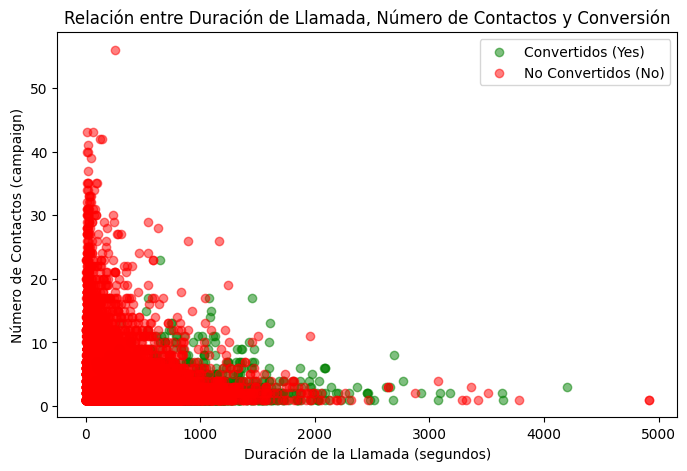

/var/folders/59/cmq4bv5j2cz8nmv_xs_d8vbc0000gn/T/ipykernel_72253/1182598217.py:30: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([df_yes['duration'].dropna(), df_no['duration'].dropna()], labels=['Sí', 'No'])


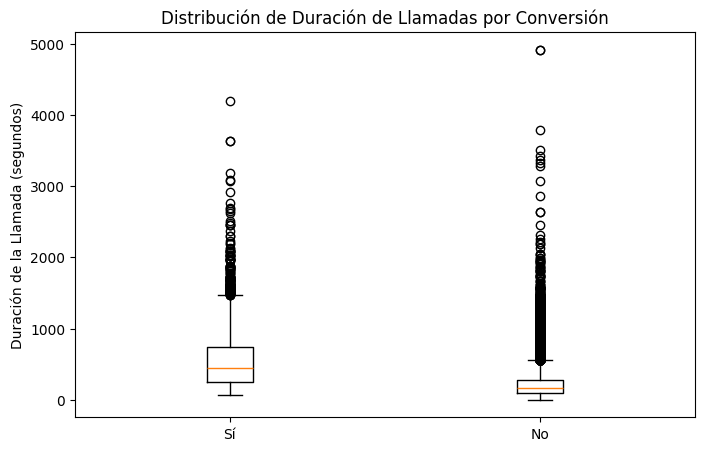

In [110]:
# Relacion entre duracion de la llamada, numero de  contactos y conversion

# Separar datos según conversión
df_yes = df_bank_csv[df_bank_csv['y'] == 'yes']
df_no = df_bank_csv[df_bank_csv['y'] == 'no']

# Calcular promedios
promedio_duracion_yes = df_yes['duration'].mean()
promedio_duracion_no = df_no['duration'].mean()
promedio_contactos_yes = df_yes['campaign'].mean()
promedio_contactos_no = df_no['campaign'].mean()

print(f"Promedio de duración de llamada (convertidos): {promedio_duracion_yes:.2f} segundos")
print(f"Promedio de duración de llamada (no convertidos): {promedio_duracion_no:.2f} segundos")
print(f"Promedio de número de contactos (convertidos): {promedio_contactos_yes:.2f}")
print(f"Promedio de número de contactos (no convertidos): {promedio_contactos_no:.2f}")

# 🔹 Scatter plot: Duración vs Número de Contactos, coloreado por Conversión
plt.figure(figsize=(8, 5))
plt.scatter(df_yes['duration'], df_yes['campaign'], color='green', alpha=0.5, label="Convertidos (Yes)")
plt.scatter(df_no['duration'], df_no['campaign'], color='red', alpha=0.5, label="No Convertidos (No)")
plt.xlabel('Duración de la Llamada (segundos)')
plt.ylabel('Número de Contactos (campaign)')
plt.title('Relación entre Duración de Llamada, Número de Contactos y Conversión')
plt.legend()
plt.show()

# 🔹 Boxplot: Duración de la llamada por Conversión
fig, ax = plt.subplots(figsize=(8, 5))
ax.boxplot([df_yes['duration'].dropna(), df_no['duration'].dropna()], labels=['Sí', 'No'])
ax.set_title('Distribución de Duración de Llamadas por Conversión')
ax.set_ylabel('Duración de la Llamada (segundos)')
plt.show()


Tasa de conversión por método de contacto:
contact
cellular     14.743028
telephone     5.158934
Name: y, dtype: float64


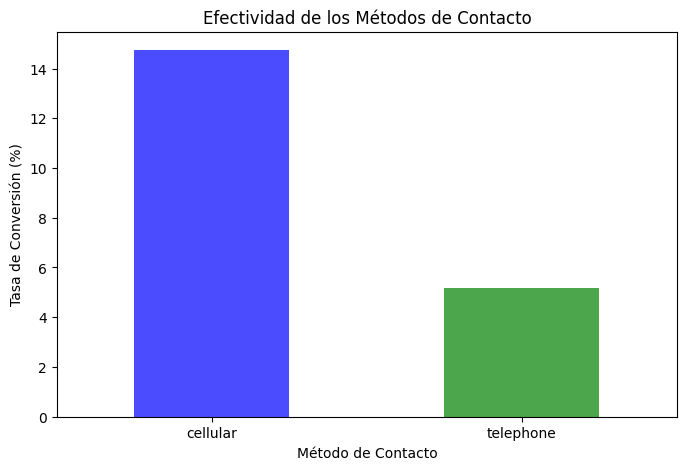

In [105]:
# Contar conversiones por tipo de contacto
contact_counts = df_bank_csv.groupby('contact')['y'].count()
contact_yes_counts = df_bank_csv[df_bank_csv['y'] == 'yes'].groupby('contact')['y'].count()

# Calcular tasa de conversión por método de contacto
conversion_rates = (contact_yes_counts / contact_counts) * 100

# Mostrar tasas de conversión
print("Tasa de conversión por método de contacto:")
print(conversion_rates)

# 🔹 Gráfico de Barras: Métodos de Contacto y Tasa de Conversión
plt.figure(figsize=(8, 5))
conversion_rates.plot(kind='bar', color=['blue', 'green', 'red'], alpha=0.7)
plt.xlabel("Método de Contacto")
plt.ylabel("Tasa de Conversión (%)")
plt.title("Efectividad de los Métodos de Contacto")
plt.xticks(rotation=0)
plt.show()


In [111]:
# Filtrar clientes que respondieron "yes"
df_yes = df_bank_csv[df_bank_csv['y'] == 'yes']

# 🔹 1. Características Demográficas de los Convertidos
print("Promedios de clientes convertidos:")
print(f"Edad Promedio: {df_yes['age'].mean():.2f}")
print(f"Duración Promedio de Llamada: {df_yes['duration'].mean():.2f} segundos")
print(f"Número Promedio de Contactos: {df_yes['campaign'].mean():.2f}")

Promedios de clientes convertidos:
Edad Promedio: 40.89
Duración Promedio de Llamada: 551.62 segundos
Número Promedio de Contactos: 2.05


In [109]:
# Verificar si 'pdays' está en el dataset (días desde el último contacto)
if 'pdays' in df_bank_csv.columns:
    # Reemplazar valores de -1 (significa que nunca fueron contactados antes)
    df_bank_csv['pdays'] = df_bank_csv['pdays'].replace(-1, np.nan)

    # Separar datos por conversión
    df_yes = df_bank_csv[df_bank_csv['y'] == 'yes']
    df_no = df_bank_csv[df_bank_csv['y'] == 'no']

    # Calcular promedios
    promedio_pdays_yes = df_yes['pdays'].mean()
    promedio_pdays_no = df_no['pdays'].mean()

    print(f"Promedio de días desde último contacto (convertidos): {promedio_pdays_yes:.2f} días")
    print(f"Promedio de días desde último contacto (no convertidos): {promedio_pdays_no:.2f} días")

 

Promedio de días desde último contacto (convertidos): 790.51 días
Promedio de días desde último contacto (no convertidos): 984.14 días


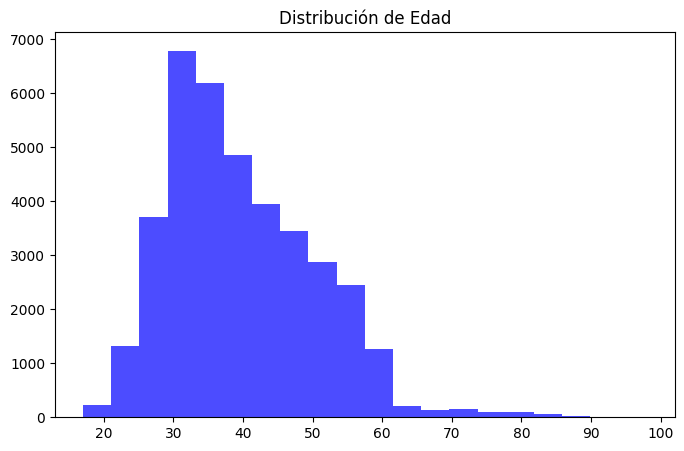

In [ ]:

# Histograma de la edad

fig, axes = plt.subplots(1, 1, figsize=(8, 5)) 
axes.hist(df_bank['age'].dropna(), bins=20, color='blue', alpha=0.7)
axes.set_title('Distribución de Edad') # Etiqueta en el eje X

plt.show()

Text(0.5, 0, 'Duración (segundos)')

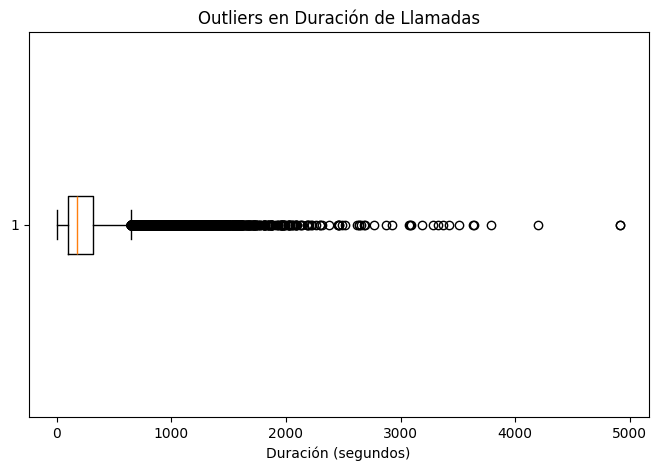

In [100]:
# Crear la figura y el eje para el boxplot
fig, ax = plt.subplots(figsize=(8, 5))

# Boxplot para detectar outliers en duración de llamadas
ax.boxplot(df_bank['duration'].dropna(), vert=False)
ax.set_title('Outliers en Duración de Llamadas')
ax.set_xlabel('Duración (segundos)')  # Etiqueta del eje X